# *Title:* Predicting and Classifying The Level of Heart Disease Based on Key Risk Factors

Word count: (need to update)

## 1. Introduction

"[Heart disease](https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118) describes a range of conditions that affect your heart" (Mayo Clinic, n.d). "[Several health conditions](https://www.cdc.gov/heartdisease/risk_factors.htm), including your lifestyle (eg. exercise), your age and family history can increase your risk for heart disease" (CDC, 2019). The main (health) risk factors are: high blood pressure, unhealthy blood cholesterol levels, diabetes and obesity (CDC, 2019). For this data analysis, we will be focusing on **age, blood pressure and blood cholesterol levels**. 

When are the selected factors risky?
- When [blood pressure](https://www.cdc.gov/bloodpressure/about.htm#:~:text=A%20normal%20blood%20pressure%20level%20is%20less%20than%20120%2F80%20mmHg.&text=No%20matter%20your%20age%2C%20you,pressure%20in%20a%20healthy%20range) is above the normal level of 120/80 mmHg (CDC, 2021)
- When [total cholesterol](https://www.medicalnewstoday.com/articles/315900#recommended-levels) levels are above 200 mg/dL (Weatherspoon, 2020)
    - A person’s serum cholesterol level represents the amount of total cholesterol in their blood

Using the data provided in the [Cleveland dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) (Detrano, 1988), we will try to answer the question: **Given the age, levels of blood pressure, and cholesterol levels of an individual patient, can we predict the presence of heart disease?** (classification)

This data was pulled from a database containing 76 attributes that describe the medical conditions of patients relating to different heart disease risk factors in four different locations. All published experiments, however, refer to using only the Cleveland dataset and a subset of 14 attributes from the 76. We will be reading this "processed" data to pick attributes (Detrano, 1988). To see the full explanation of each of the attributes, please refer to the [Cleveland dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) (Detrano, 1988).

The "num" attribute refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4 (a value greater than 1 will indicate heart disease and higher numbers indicate worsening levels of heart disease). We will assume that the presence of heart disease is affirmed if the num value is a value that is not 0 (Detrano, 1988). 

## 2. Methods & Results

### 2.1 Reading the data into R

This first step includes loading the packages necessary to download the data.

In [45]:
#loading packages

library(tidyverse)
library(repr)
library(readxl)
library(rvest)
library(stringr)
library(tidymodels)
library(RColorBrewer)
library(digest)
library(infer)
library(cowplot)
library(digest)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)

The next step is loading the Cleveland dataset (Detrano, 1988) from the web, using the URL below and then using the function `read_csv` to read the data and separate it via commas to produce a table of the data. The comments describe each of the column names and what they represent. Lastly, the `rename` function is used to give the columns appropraite title names. 

In [47]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

heart_disease_data <- read_csv(url, col_names = FALSE)
        
#renaming columns
#refer to Cleveland dataset for full descriptions of each of the attributes
heart_disease_data <- rename(heart_disease_data,
                            age = X1, # age (in years)
                            sex = X2, # sex (1 = male, 0 = female)
                            chest_pain = X3, # Cp (Chest pain type)
                                                    # -- Value 1: typical angina
                                                   # -- Value 2: atypical angina
                                                   # -- Value 3: non-anginal pain
                                                   # -- Value 4: asymptomatic
                            trestbps = X4, # Trestbps (resting blood pressure (in mm Hg on admission to the hospital))
                            chol = X5, # Chol (serum cholestoral in mg/dl)
                            fbs = X6, #  Fbs (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
                            restecg = X7, # Restecg (restecg: resting electrocardiographic results
                                                # -- Value 0: normal
                                                # -- Value 1: having ST-T wave abnormality (T wave inversions 
                                                     # and/or ST elevation or depression of > 0.05 mV)
                                                # -- Value 2: showing probable or definite left ventricular hypertrophy by 
                                                         #Estes' criteria
                            thalach = X8, # Thalach: maximum heart rate achieved
                            exang = X9,# Exang: exercise induced angina (1 = yes; 0 = no)
                            oldpeak = X10, # Oldpeak: ST depression induced by exercise relative to rest
                            slope = X11, # Slope: the slope of the peak exercise ST segment
                                                # -- Value 1: upsloping
                                                # -- Value 2: flat
                                                # -- Value 3: downsloping
                            ca = X12, # Ca number of major vessels (0-3) colored by flourosopy
                            thal = X13, # Thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
                            hd_presence = X14 # Num: (the predicted attribute - presence of heart disease) num: diagnosis of heart disease (angiographic disease status)
                                                    # -- Value 0: < 50% diameter narrowing
                                                    # -- Value 1: > 50% diameter narrowing

                            )
heart_disease_data

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_double()
)



age,sex,chest_pain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd_presence
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


*Table 2.1: Cleveland data with renamed columns*

### 2.2 Cleaning and Wrangling data

From the original downloaded data (above) the data must now be cleaned and wrangled by using the `mutate` function to assign each column to their appropriate data type for better data 

In [18]:
heart_disease_data <- mutate(heart_disease_data,
                            age = as.integer(age, na.rm = TRUE),
                            ca = as.numeric(ca, na.rm = TRUE),
                            thal = as.numeric(thal, na.rm = TRUE),
                            hd_presence = as_factor(hd_presence),
                            fbs = as.integer(fbs, na.rm = TRUE))

heart_disease_data

Warning message:
“Problem with `mutate()` input `ca`.
ℹ NAs introduced by coercion
ℹ Input `ca` is `as.numeric(ca, na.rm = TRUE)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `thal`.
ℹ NAs introduced by coercion
ℹ Input `thal` is `as.numeric(thal, na.rm = TRUE)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


age,sex,chest_pain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd_presence
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
38,1,3,138,175,0,0,173,0,0.0,1,NA,3,0


*Table 2.2: Cleveland dataset with correct data type columns*

### 2.3 Summarizing training data

A summary of the training data includes setting the seed, to ensure reproducible randomization, then using the `initial_split` function to create testing and training data to use for classification. Only training data will be used for the exploratory analysis. The summary table will also show the number of each level of heart disease using the `group_by` and `summarize` functions. Using the same functions, the means of the relevant variables will also be calculated. Finally, the columns will be bound and displayed in a summary table.

In [19]:
#setting the seed to ensure consistent randomization
set.seed(1)
#splitting data into training and testing
#"heart disease" will be abbreviated to "hd"

hd_split <- initial_split(heart_disease_data, prop = 0.75, strata = hd_presence)
hd_train <- training(hd_split)
hd_test <- testing(hd_split)

#summarizing the training data by hd_presence (counting the number in each level of heart disease)
num_hd_presence <- hd_train %>%
                        group_by(hd_presence) %>%
                        summarize(n = n()) %>%
                        select(-hd_presence)

#calculating means
means <- hd_train %>%
        group_by(hd_presence) %>%
        summarize(
          mean_age = mean(age, na.rm = TRUE),
            mean_chol = mean(chol, na.rm = TRUE), #chol is (serum cholesterol in mg/dl)
            mean_trestbps = mean(trestbps, na.rm = TRUE))

means

#final summary table of means of selected predictors and the number of hd_presence
summary_table <- bind_cols(means, num_hd_presence)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



hd_presence,mean_age,mean_chol,mean_trestbps
<fct>,<dbl>,<dbl>,<dbl>
0,52.71545,241.2439,128.8293
1,56.57143,252.6905,133.6429
2,57.40741,264.2222,134.6296
3,55.69231,239.9231,132.6538
4,58.20000,254.7000,137.1000


*Table 2.3: Table of selected variable means*

### 2.3.1 Summary Table

In [20]:
summary_table

hd_presence,mean_age,mean_chol,mean_trestbps,n
<fct>,<dbl>,<dbl>,<dbl>,<int>
0,52.71545,241.2439,128.8293,123
1,56.57143,252.6905,133.6429,42
2,57.40741,264.2222,134.6296,27
3,55.69231,239.9231,132.6538,26
4,58.20000,254.7000,137.1000,10


*Table 2.3.1: Summary Table*

### 2.3.2 NA Values

The NA values in this dataset can be found using the `na.omit()` function to see how many rows have been removed and then using the `is.na` fucntion to see how many rows within the `ca` column have NA values.

In [21]:
#calculating the number of rows in ca with missing values
#using the na.omit() function we see that 3 rows are removed - by looking at the heart_disease_data, 
#we see that the ca column is the only column with a missing value - thus it has been selected here
na_values <- hd_train %>%
filter(is.na(ca)) %>%
nrow()
#total rows with na values in hd_train
na_values

[1] 3

### 2.4 Visualizing the data

After cleaning and wrangling and performing some exploratory data analysis of the data, we can now visualize the data for a better sense of relationships of the predictors and the predicted data. First, two scatterplots (using the `ggplot` and `geom_point` functions) both with age on the x axis and one with the maximum heart rate (thalach) and one with the serum cholesterol levels (chol) will be constructed, and both will show the relationship of the variables in relation to the levels of heart disease.

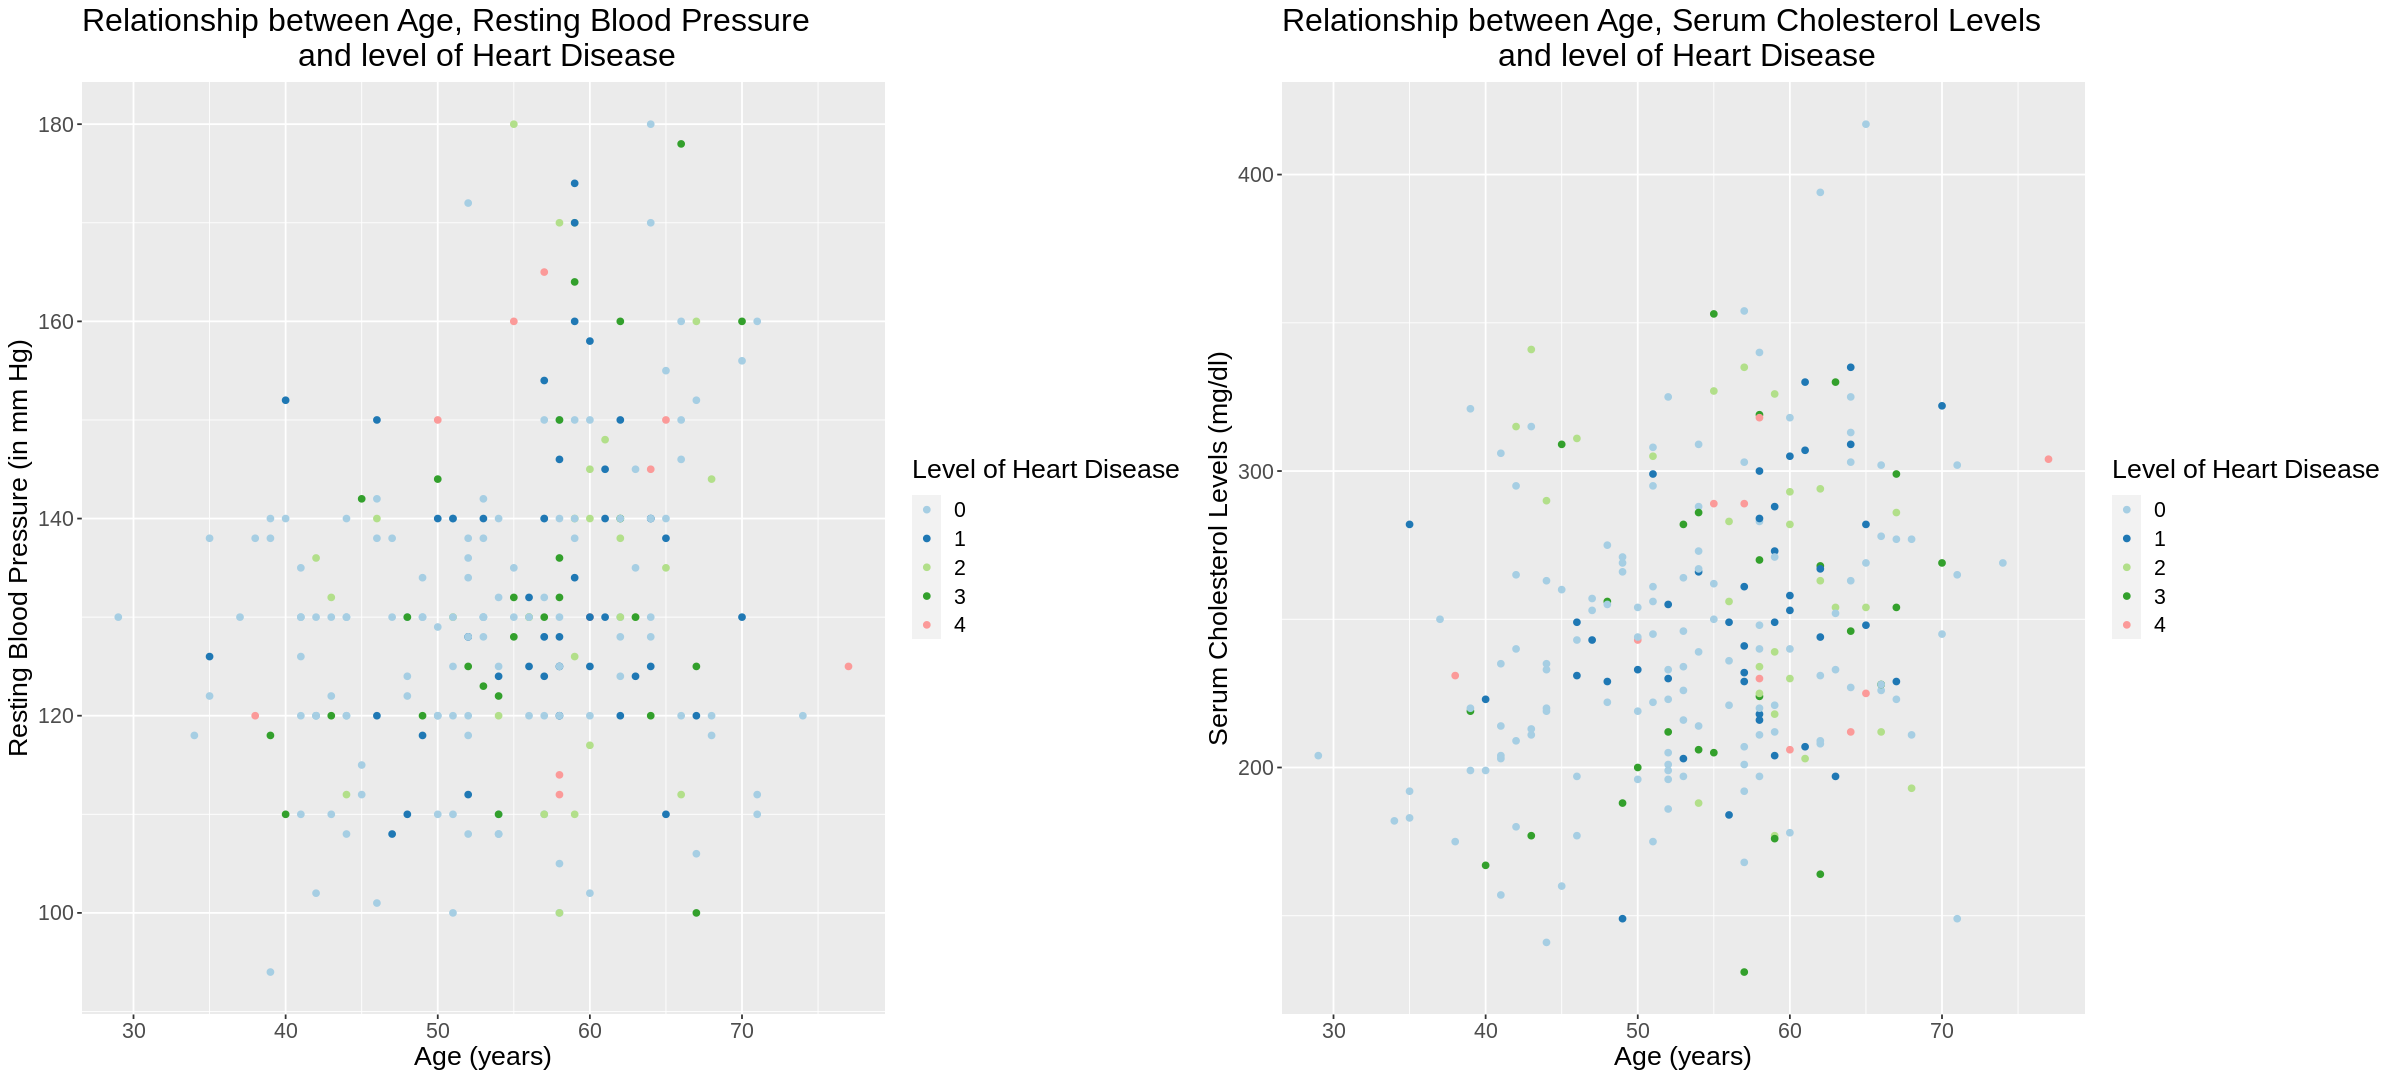

In [22]:
options(repr.plot.width = 20, repr.plot.height = 9) 

scatter_age_trestbps <- ggplot(hd_train, aes(x = age, y = trestbps, color = hd_presence)) +
    geom_point() +
   theme(text = element_text(size = 16))+
    labs(x = "Age (years)", y = "Resting Blood Pressure (in mm Hg)", color = "Level of Heart Disease")+
    ggtitle("Relationship between Age, Resting Blood Pressure 
                        and level of Heart Disease")+
   scale_color_brewer(palette = "Paired")

scatter_age_chol <- ggplot(hd_train, aes(x = age, y = chol, color = hd_presence)) +
    geom_point() +
    theme(text = element_text(size = 16))+
    labs(x = "Age (years)", y = "Serum Cholesterol Levels (mg/dl)", color = "Level of Heart Disease")+
    ggtitle("Relationship between Age, Serum Cholesterol Levels 
                        and level of Heart Disease")+
    scale_color_brewer(palette = "Paired")

plot_grid(scatter_age_trestbps, scatter_age_chol, ncol = 2)


*Figure 1 (left): Relationship between Resting Blood Pressure, Age and Level of Heart Disease* 

*Figure 2 (right): Relationship between Serum Cholesterol, Age and level of Heart Disease*

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



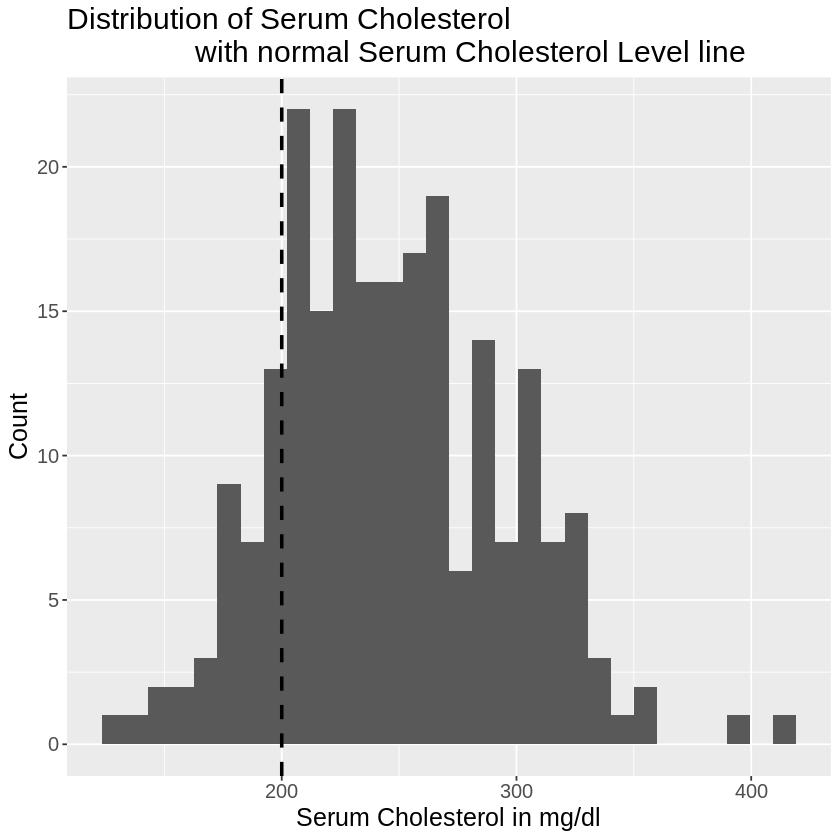

In [23]:
options(repr.plot.width = 7, repr.plot.height = 7) 

hd_train_chol <- ggplot(hd_train, aes(x = chol)) +
    geom_histogram() +
    geom_vline(xintercept = 200, linetype = "dashed", size = 1)+
    theme(text = element_text(size = 15))+
    labs(x = "Serum Cholesterol in mg/dl", y = "Count")+
    ggtitle("Distribution of Serum Cholesterol 
                with normal Serum Cholesterol Level line")
hd_train_chol

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



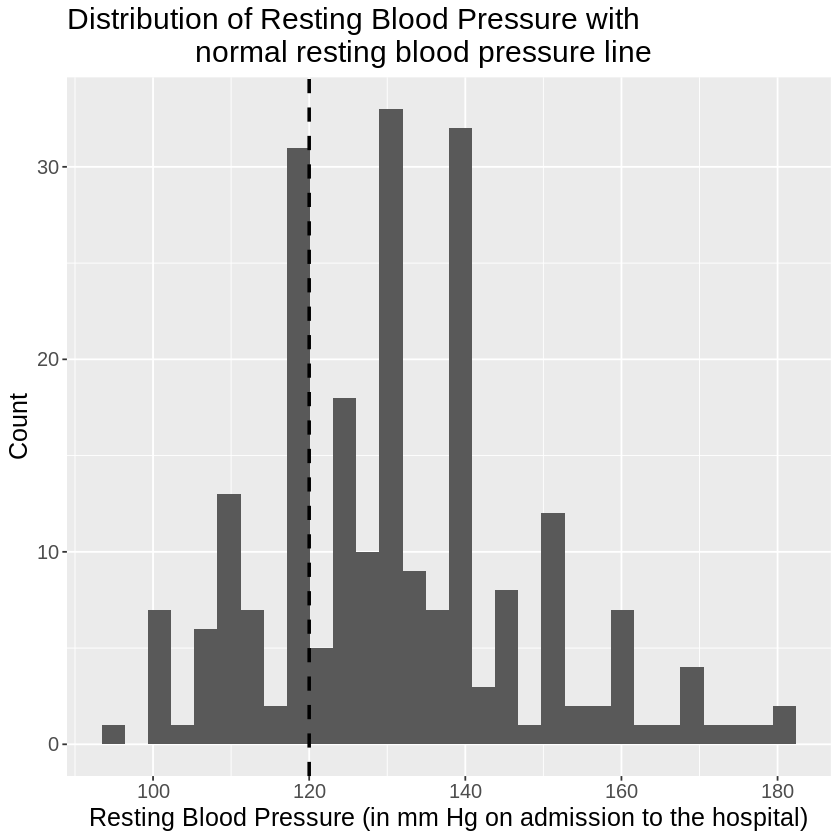

In [24]:
hd_train_trestbps <- ggplot(hd_train, aes(x = trestbps)) +
    geom_histogram()+
    geom_vline(xintercept = 120, linetype = "dashed", size = 1)+
    theme(text = element_text(size = 15))+
    labs(x = "Resting Blood Pressure (in mm Hg on admission to the hospital)", y = "Count")+
    ggtitle("Distribution of Resting Blood Pressure with 
                normal resting blood pressure line")

hd_train_trestbps

## 2.5 Methods

To answer our question, we will be using the **k-nearest neighbors classification algorithm** to predict the presence of heart disease. We will use these column attributes as predictors based on our research (intro):
- age 
- trestbps (blood pressure)
- chol (cholesterol levels)
- hd_presence (response variable)

We will  be preforming cross validation and will tune and then evaluate the estimated accuracy of the classifier on the test set. Finally, we will visualize the results by creating multiple scatterplots with 2 of the 4 predictors on the axes and the colour of the points will correspond to the response variable (hd_presence). These scatterplots will hopefully show an accurate classification of individuals with and without heart disease based on the predictors.

# 3. Data Analysis

In [25]:
#re-using split data

hd_split <- initial_split(heart_disease_data, prop = 0.75, strata = hd_presence)
hd_train <- training(hd_split)
hd_test <- testing(hd_split)

# 5 fold
hd_vfold <- vfold_cv(hd_train, v = 5, strata = hd_presence)

#recipe

hd_recipe <- recipe(hd_presence ~ age + chol + trestbps, data = hd_train) %>%
                    step_scale(all_predictors()) %>%
                    step_center(all_predictors())

# knn specification

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
                set_engine("kknn") %>%
                set_mode("classification")

# k values
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))


# fitting vfold to workflow
knn_results <- workflow() %>%
  add_recipe(hd_recipe) %>%
  add_model(knn_spec) %>%
  tune_grid(resamples = hd_vfold, grid = k_vals) %>%
  collect_metrics() 

accuracies <- knn_results %>%
  filter(.metric == "accuracy") 

accuracies


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.4231688,5,0.01702950,Model01
6,accuracy,multiclass,0.4590194,5,0.02748351,Model02
11,accuracy,multiclass,0.5161467,5,0.02657359,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
86,accuracy,multiclass,0.5374106,5,0.008674898,Model18
91,accuracy,multiclass,0.5374106,5,0.008674898,Model19
96,accuracy,multiclass,0.5374106,5,0.008674898,Model20


In [29]:
options(repr.matrix.max.rows = 20)
selected_k <- accuracies %>%
            arrange(desc(mean))
selected_k

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
41,accuracy,multiclass,0.5461063,5,0.009095669,Model09
46,accuracy,multiclass,0.5461063,5,0.009095669,Model10
56,accuracy,multiclass,0.5461063,5,0.009095669,Model12
21,accuracy,multiclass,0.5420486,5,0.021750396,Model05
26,accuracy,multiclass,0.5420486,5,0.021750396,Model06
31,accuracy,multiclass,0.5418510,5,0.020361417,Model07
51,accuracy,multiclass,0.5417585,5,0.007751705,Model11
36,accuracy,multiclass,0.5375032,5,0.018314894,Model08
61,accuracy,multiclass,0.5374106,5,0.008674898,Model13


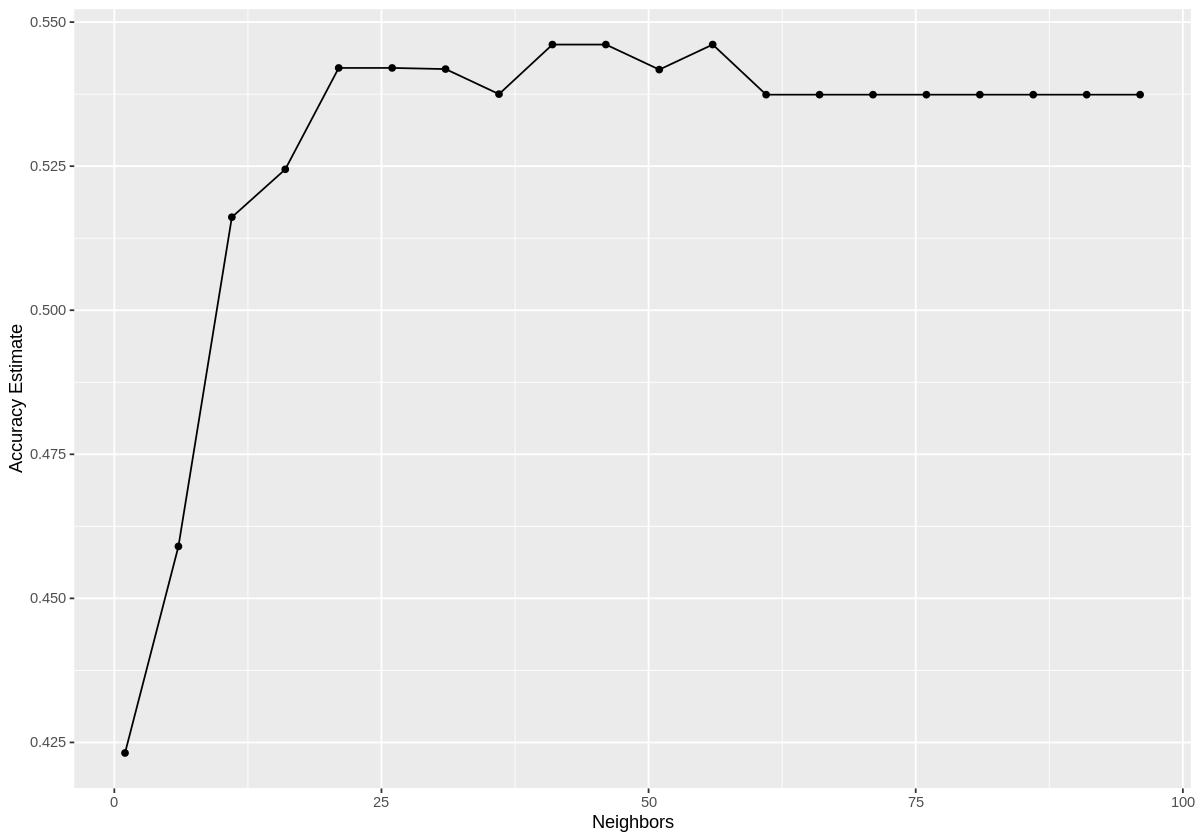

In [30]:
options(repr.plot.width = 10, repr.plot.height = 7) 
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")

accuracy_vs_k

In [31]:
options(repr.matrix.max.rows = 6)

knn_spec_k <- nearest_neighbor(weight_func = "rectangular", neighbors = 41) %>%
  set_engine("kknn") %>%
  set_mode("classification")

knn_fit <- workflow() %>%
  add_recipe(hd_recipe) %>%
  add_model(knn_spec_k) %>%
  fit(data = hd_train)

hd_test_predictions <- predict(knn_fit, hd_test) %>%
  bind_cols(hd_test)

hd_test_predictions

accuracy_test <- hd_test_predictions %>%
  metrics(truth = hd_presence, estimate = .pred_class) %>%
  filter(.metric == "accuracy")
accuracy_test

.pred_class,age,sex,chest_pain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd_presence
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
0,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
0,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,56,1,2,130,221,0,2,163,0,0.0,1,0,7,0
0,55,0,2,132,342,0,0,166,0,1.2,1,0,3,0
0,59,1,4,164,176,1,2,90,0,1.0,2,2,6,3


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.527027


## 3.1 Visualization of Data Analysis

age,trestbps,chol
<dbl>,<dbl>,<dbl>
60,157,350


.pred_class
<fct>
0


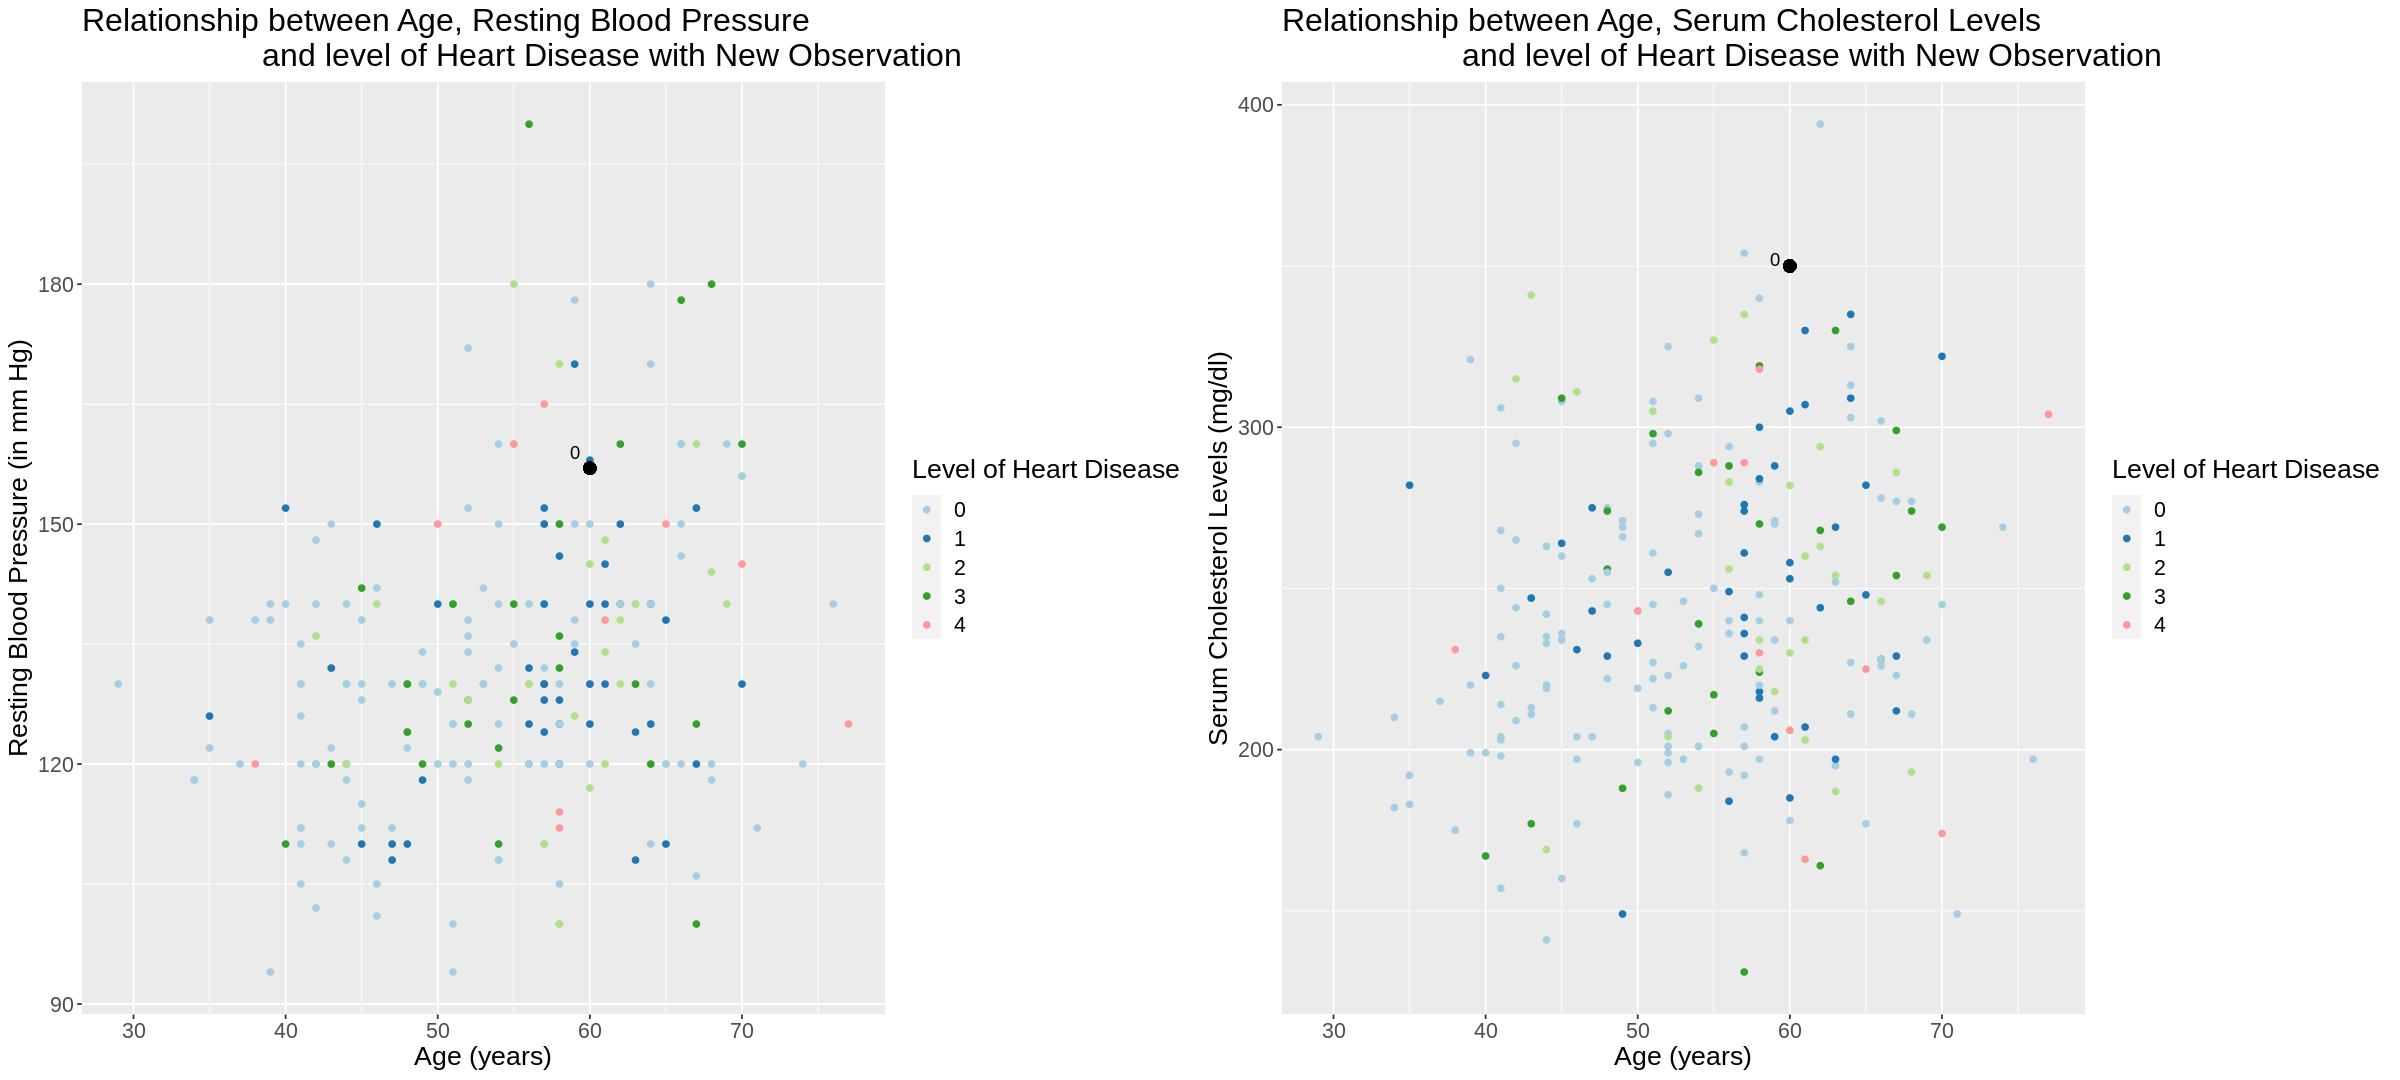

In [44]:
#use ggpairs or cut down on the predictors
#use ggpairs with training data
#use code to do colouring
#whole_thing <- ggpairs(hd_train, columns = "age", "trestbps", "chol", "hd_presence") 
#specify response variable CHECK TEXTBOOK

#create new tibble
#pass new tibble into predict(knn_fit, tibble)
#create new point and circle it on the plot of hd_train
# 3 plots side by side of all the predictors

new_point <- tibble(age = 60, trestbps = 157, chol = 350)
new_point

predict(knn_fit, new_point)

options(repr.plot.width = 20, repr.plot.height = 9) 


scatter_age_trestbps <- ggplot(hd_train, aes(x = age, y = trestbps, color = hd_presence)) +
    geom_point() +
   theme(text = element_text(size = 16))+
    labs(x = "Age (years)", y = "Resting Blood Pressure (in mm Hg)", color = "Level of Heart Disease")+
    ggtitle("Relationship between Age, Resting Blood Pressure 
                    and level of Heart Disease with New Observation")+
   scale_color_brewer(palette = "Paired")

trestbps_scatter_newpoint <- scatter_age_trestbps + geom_point(aes(x = 60, y = 157), color = "black", size = 3) + 
                                        annotate("text", x = 59, y = 159, label = "0")

chol_scatter_newpoint <- scatter_age_chol + geom_point(aes(x = 60, y = 350), color = "black", size = 3)+
                                    annotate("text", x = 59, y = 352, label = "0")

scatter_age_chol <- ggplot(hd_train, aes(x = age, y = chol, color = hd_presence)) +
    geom_point() +
    theme(text = element_text(size = 16))+
    labs(x = "Age (years)", y = "Serum Cholesterol Levels (mg/dl)", color = "Level of Heart Disease")+
    ggtitle("Relationship between Age, Serum Cholesterol Levels 
                    and level of Heart Disease with New Observation")+
    scale_color_brewer(palette = "Paired")

plot_grid(trestbps_scatter_newpoint, chol_scatter_newpoint, ncol = 2)



# 4. Discussion

* comment on how your model isn't very good - low accuracy
* summarize what you found
* discuss whether this is what you expected to find?
* discuss what impact could such findings have?
* discuss what future questions could this lead to?


Our classification model had an overall low accuracy rate. The highest accuracy that the cross-validation process for $k$ yielded 54.6% accuracy, with a relatively high value of k = 41. As a result, even when using the optimal value of $k$, the best accuracy we were able to obtain after predicting with our model on the test data was 52.7%. With such a low level of accuracy classification, our model is no better than eyeballing the data and guessing the classification, as there's around a 50% chance you will choose the correct classification. 

Based on the exploratory data analysis, we thought there was some moderate correlation between the variables and the response variable, but apparently there is not enough correlation between age, cholesterol, and resting blood pressure to accurately predict the presence of heart disease. We expected a higher level of accuracy from our classifier, as the predictors that we chose are known to be risk factors for the presence of heart disease. 

Our final visualization plots are the exploratory plots with a new point and the predicted level of heart disease. Based on the random variables chosen and the knowledge of risk factors, with a older age (60 years), blood pressure above the normal level of 120/80 mmHg (157 mmHg) and high total cholesterol that is above 200 mg/dl (350 mg/dl), one would expect there to be a presence of heart disease (greater than 0). However, passing the new point through the k nearest neighbours fit yielded a predicted class of 0, indicating no presence of heart disease. Due to the low level of accuracy of our classifier this result is relatively unreliable and concrete inferences cannot be made from it.

Based on our low accuracy of our classifier and our overall findings, we might infer that the low level of accuracy might be due to the fact that we used too many predictors, or that it is simply hard to predict levels of heart disease, even with known risk factors.

Future questions may want to examine the correlation of one or two variables, eg. using linear or k-nearest neighbour regression analysis to see if these risk factors actually do have a statistically significant correlation/relationship to the presence of heart disease. 

# 5. References

CDC. (2019, Dec 9). *Heart Disease*. Centers for Disease Control and Prevention. https://www.cdc.gov/heartdisease/risk_factors.htm

CDC. (2021, May 18). *High Blood Pressure*. Centers for Disease Control and Prevention. https://www.cdc.gov/bloodpressure/about.htm 

Detrano, R. (1988). Heart Disease Data Set [Data Set]. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation. https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Mayo Clinic. (n.d). *Heart Disease*. Mayo Clinic. https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118

Weatherspoon, D. (2020, Jan 5). *What should my cholesterol level be at my age?*. Medical News Today. https://www.medicalnewstoday.com/articles/315900

Lastname, F. M. or Name of Group (Year). Title of dataset (Version No.) [Data set]. Publisher. DOI or URL

Group name. (Year, Month Date). *Title of page*. Site name. URL